# Move files around

In [1]:
import os
import shutil

# define directory paths
base_path = "C-NMC_Leukemia"
training_data_path = os.path.join(base_path, "training_data")
all_folders = ["fold_0/all", "fold_1/all", "fold_2/all"]
hem_folders = ["fold_0/hem", "fold_1/hem", "fold_2/hem"]
new_all_path = os.path.join(training_data_path, "new_all")
new_hem_path = os.path.join(training_data_path, "new_hem")

# create new directories
os.makedirs(new_all_path, exist_ok=True)
os.makedirs(new_hem_path, exist_ok=True)

# move all image files from 'all' folders to 'new_all' directory
for folder_path in all_folders:
    folder = os.path.join(training_data_path, folder_path)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        shutil.move(file_path, new_all_path)

# move all image files from 'hem' folders to 'new_hem' directory
for folder_path in hem_folders:
    folder = os.path.join(training_data_path, folder_path)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        shutil.move(file_path, new_hem_path)

# remove all the empty directories after moving the images
shutil.rmtree(training_data_path+'/fold_0')
shutil.rmtree(training_data_path+'/fold_1')
shutil.rmtree(training_data_path+'/fold_2')

print("Image files moved successfully.")

Image files moved successfully.


# Visualizing Data Imabalance ⚖️

In [3]:
total_all_files=len(os.listdir(new_all_path))
total_hem_files=len(os.listdir(new_hem_path))

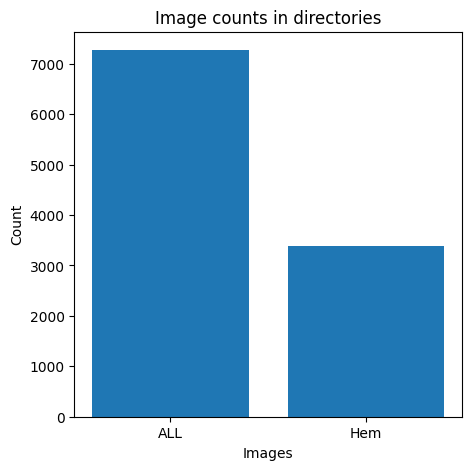

[7272, 3389]


In [4]:
import matplotlib.pyplot as plt

labels = ['ALL', 'Hem']
counts = [total_all_files, total_hem_files]
fig = plt.figure(figsize=(5, 5))
plt.bar(labels, counts)
plt.title('Image counts in directories')
plt.xlabel('Images')
plt.ylabel('Count')
plt.show()

print(counts)

# Dealing with Imabalance- Data Augmentation

In [5]:
augmented_hem = os.path.join(training_data_path,"augmented_hem")

# create directory where we will store the augmented hem images
os.mkdir(augmented_hem)

In [6]:
# read Hem images from disk and store them in an array
import numpy as np
from skimage import io
from PIL import Image

hem_in_list=[]

hem_images_paths = os.listdir(new_hem_path)
for i, image_name in enumerate(hem_images_paths):
    if(image_name.split('.')[1] == 'bmp'):
        image = io.imread(new_hem_path+'/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((210,210)) #210x210
        hem_in_list.append(np.array(image))

hem_in_array = np.array(hem_in_list)

In [11]:
# create an ImageDataGenerator object for data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=35,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='reflect'
)

In [12]:
batches = 3883//32
batches

121

In [13]:
#start generating augmented images
i = 0
for batch in datagen.flow(hem_in_array,
                         batch_size=32,
                         save_to_dir=augmented_hem,
                         save_prefix='aug_',
                         save_format='bmp'):
    i+=1
    if i>121:
        break

print("Done!")

Done!


## Visualize images ratio after augmentation ⚖️

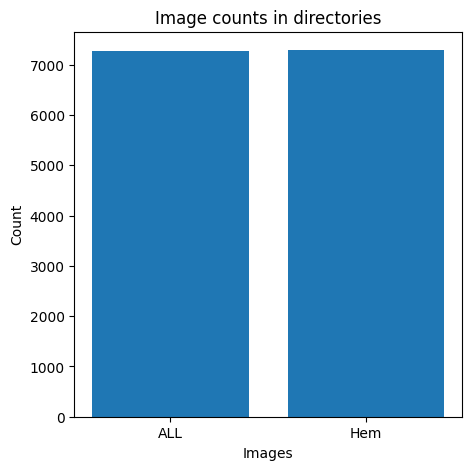

[7272, 7290]


In [14]:
total_all_files=len(os.listdir(new_all_path))
total_hem_files=len(os.listdir(new_hem_path))+len(os.listdir(augmented_hem))

labels = ['ALL', 'Hem']
counts = [total_all_files, total_hem_files]
fig = plt.figure(figsize=(5, 5))
plt.bar(labels, counts)
plt.title('Image counts in directories')
plt.xlabel('Images')
plt.ylabel('Count')
plt.show()

print(counts)

# Behind the screen 👨‍💻

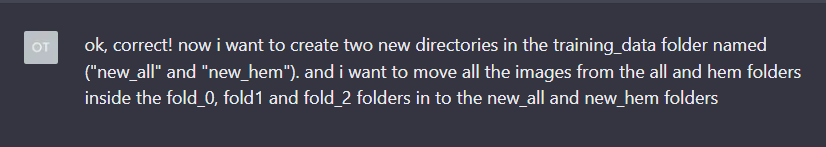

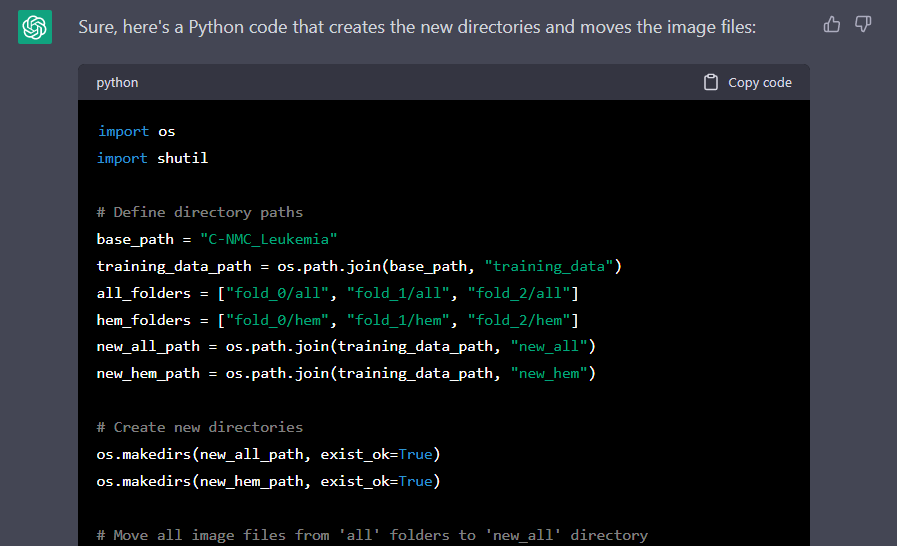

In [15]:
# move images from augmented_hem directory to new_hem directory
for filename in os.listdir(augmented_hem):
    file_path = os.path.join(augmented_hem, filename)
    shutil.move(file_path, new_hem_path)

# remove the augmented hem directory after moving the images
shutil.rmtree(augmented_hem)

print("Done!")

Done!


# Image Preprocessing

In [16]:
# read Hem images from disk and store them in an array
hem_in_list=[]

hem_images_paths = os.listdir(new_hem_path)
for i, image_name in enumerate(hem_images_paths):
    if(image_name.split('.')[1] == 'bmp'):
        image = io.imread(new_hem_path+'/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((210,210)) #210x210
        hem_in_list.append(np.array(image))

hem_in_array = np.array(hem_in_list)

In [17]:
# read ALL images from disk and store them in an array
all_in_list=[]

all_images_paths = os.listdir(new_all_path)
for i, image_name in enumerate(all_images_paths):
    if(image_name.split('.')[1] == 'bmp'):
        image = io.imread(new_all_path+'/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((210,210)) #210x210
        all_in_list.append(np.array(image))

all_in_array = np.array(all_in_list)

In [19]:
print(f"No. of Hem images: {len(hem_in_array)}")
print(f"No. of ALL images: {len(all_in_array)}")

No. of Hem images: 7290
No. of ALL images: 7272


## Crop the images ✂️

In [24]:
# define a function that takes in images array as input and return another array that has the images cropped
def crop(arr):
    """
    Function for cropping images.
    Input: Images array.
    Returns: Cropped Images array.
    """
    cropped_images=[]
    for each_image in arr:
        cropped_image = each_image[30:-30, 30:-30, :]
        cropped_images.append(cropped_image)
        
    cropped=np.array(cropped_images)
    return cropped

In [25]:
#crop ALL and Hem images
cropped_all_in_array = crop(all_in_array)
cropped_hem_in_array = crop(hem_in_array)

## Visualize Images before and after cropping 

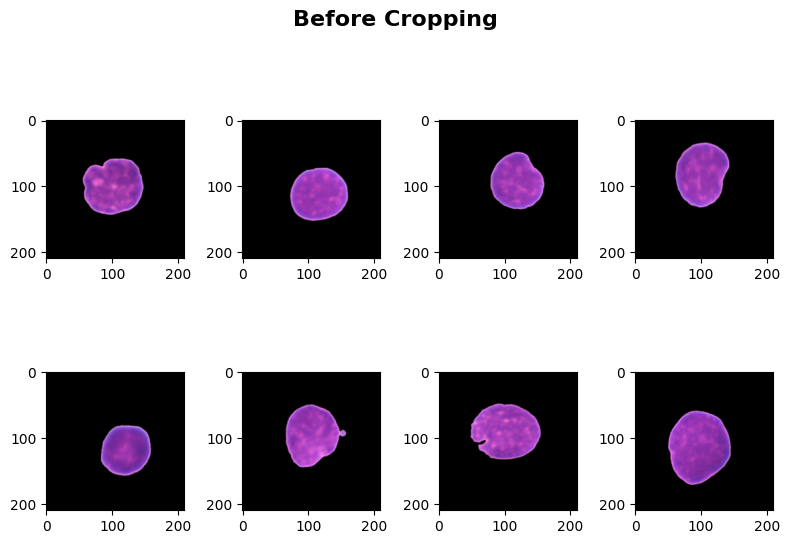

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i in range(8):
        ax.imshow(hem_in_array[i], cmap='gray')
    else:
        ax.axis('off')
fig.suptitle('Before Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

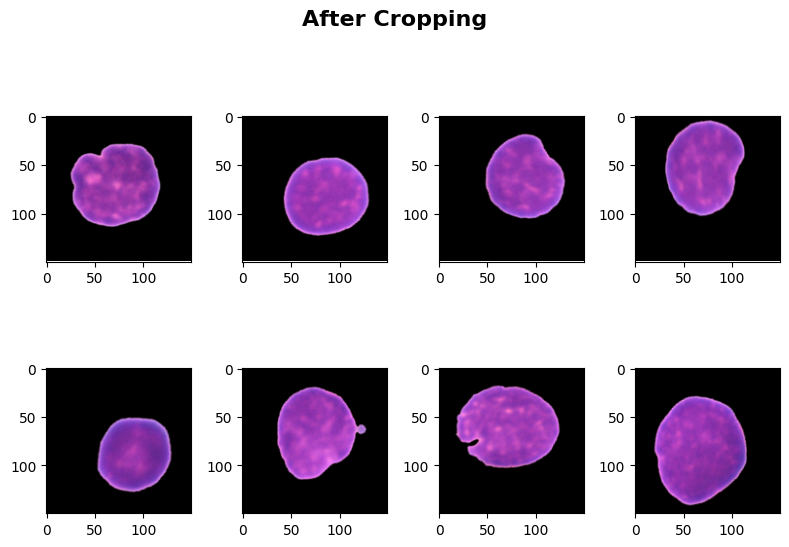

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i in range(8):
        ax.imshow(cropped_hem_in_array[i], cmap='gray')
    else:
        ax.axis('off')
fig.suptitle('After Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()